In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve
import matplotlib.image as image
import sys
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
# load spatial and temporal profile

sys.path.insert(1, '/user/sebert/home/Documents/Repositories/motion/anticipation_1D')
from utils import  DOG
from stimuli import stim_moving_object_for_2D_net


In [3]:
# load parameter 
net_name = f'Reciporcal_mono_linear_plastic_opt/noGCGainControl/fixed'
filepath = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net_name}/wBA/wBA_0.0/smooth_0.1'

with open(f'{filepath}/params', 'rb') as handle:
    params = pickle.load(handle)

    

In [44]:
# create profiles
stimulus_maker = stim_moving_object_for_2D_net(params,
                                                    filepath = filepath)



ftime = np.arange(0,1,params['dt'])

tkern = stimulus_maker.filter_biphasic_norm()


params['SF'] = 1.
stimulus_maker = stim_moving_object_for_2D_net(params,
                                                    filepath = filepath)

tkern_bif= stimulus_maker.filter_biphasic_norm()




spacing = params['spacing']
nb_cells = params['nb_cells']
sig_c = params['rf_BC']/6/spacing
sig_s =  params['rf_BC_s']/6/spacing
w = params['w_BC']
x = np.arange(nb_cells)*spacing
skern = DOG(x,int(nb_cells/2)*spacing, sig_c*spacing,sig_s*spacing,w)

# 2D 

def spatial_kernel(stimulus,sig_c,sig_s,w=0):

    out_c = gaussian_filter(stimulus, sig_c)
    out_s = gaussian_filter(stimulus, sig_s)
    out_total = out_c - w*out_s
        
    return out_total


In [45]:
%matplotlib inline

# schematic filter

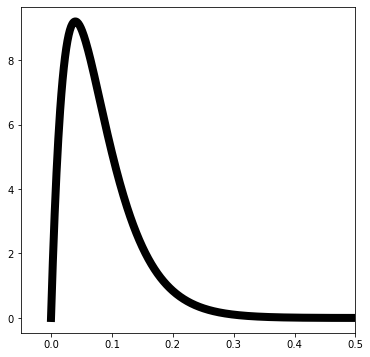

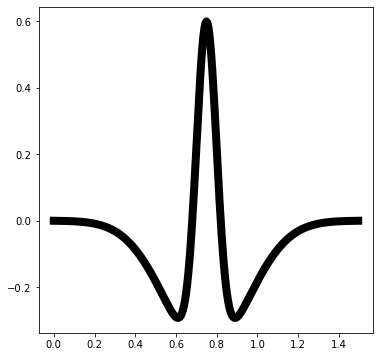

In [40]:
# plot spatial and temporal profile

plt.figure(figsize = (6,6))
plt.plot(ftime,tkern, color = 'k', linewidth = 8)
plt.xlim(-.05,0.5)




plt.figure(figsize = (6,6))
plt.plot(x,skern, color = 'k', linewidth = 8)


# filter plot for intro

In [73]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3

figsize = (16,8)
image_format = "png"
dpi = 300

panellabel_position = [-0.05, .8]


In [74]:



def biphasic_alpha(t,tauOPL,tauOPL2,SF):
    
    kern =  (t/tauOPL**2) * np.exp(-t/tauOPL) * np.heaviside(t,1) -  SF* (t/tauOPL2**2) * np.exp(-t/tauOPL2) * np.heaviside(t,1) 
    # kern = (t/tauOPL) * np.exp(-t/tauOPL) * np.heaviside(t,1) -  SF* (t/tauOPL2) * np.exp(-t/tauOPL2) * np.heaviside(t,1) 
    # kern = kern/(np.sum(kern)*0.001)
    #calculate integral
    return  kern


tauOPLmono = 0.04
tauOPL = 0.08
tauOPL2 = 0.0876
SF = 1.

ftime = np.arange(0,1,0.001)
filter_mono = biphasic_alpha(ftime,tauOPLmono,1,0)
filter_mono = filter_mono/filter_mono.max()
filter_bi = biphasic_alpha(ftime,tauOPL,tauOPL2,SF)
filter_bi = filter_bi/filter_bi.max()


xspace = np.arange(30,70,1)




def gaussian_2D(x,sigma,pos):
    
    x,y = np.meshgrid(x,x)
    
    return np.exp(-((x-pos)**2 + (y-pos)**2)/(2*sigma**2))/(2*np.pi*sigma**2)

def DOG_2D(x,sigma_center,surround,pos):
    
    x,y = np.meshgrid(x,x)
    
    return np.exp(-((x-pos)**2 + (y-pos)**2)/(2*sigma_center**2))/(2*np.pi*sigma_center**2) - np.exp(-((x-pos)**2 + (y-pos)**2)/(2*sigma_surround**2))/(2*np.pi*sigma_surround**2)



# params 
sigma_center = 2.5
sigma_surround = 7.5
pos = 50


out_c_manual = gaussian_2D(xspace,sigma_center, pos)
out_s_manual = gaussian_2D(xspace,sigma_surround, pos)
out_total_manual = out_c_manual - 3*out_s_manual




Text(0.5, 0, 'y')

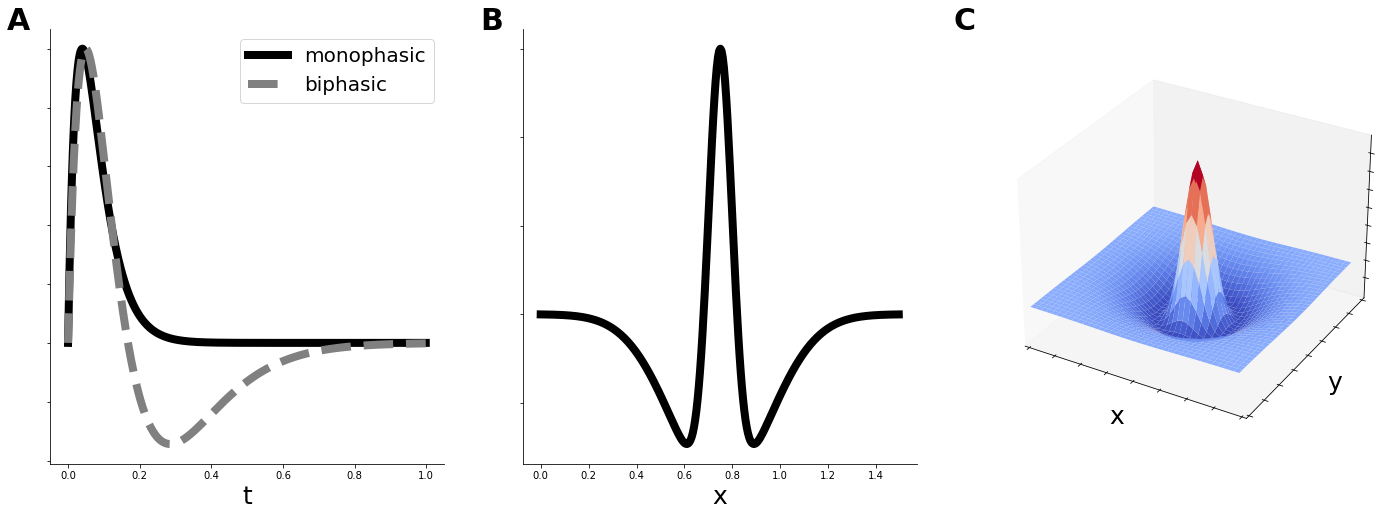

In [77]:
# plot spatial and temporal profile
x = np.arange(nb_cells)*spacing


fig= plt.figure(figsize = (24,8))


ax = fig.add_subplot(131)

ax.plot(ftime,filter_mono, color = 'k', linewidth = 8, label = 'monophasic')
ax.plot(ftime,filter_bi, color = 'grey', linewidth = 8, label = 'biphasic', linestyle = '--')
plt.xlim(-.05,1.05)
ax.set_xlabel('t', fontsize = fontsize_labels)
#ax.set_ylabel('stimulus intensity', fontsize = fontsize_labels)
ax.set_yticklabels([])
ax.spines[['right', 'top']].set_visible(False)

ax.legend(fontsize = fontsize_legend)

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')





ax = fig.add_subplot(132)
ax.plot(x,skern, color = 'k', linewidth = 8)
ax.set_xlabel('x', fontsize = fontsize_labels)
ax.set_yticklabels([])
ax.spines[['right', 'top']].set_visible(False)

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



fig.text(panellabel_position[0]+1.2,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

ax = fig.add_subplot(133, projection='3d')

x,y = np.meshgrid(xspace,xspace)

ax.plot_surface(x,y,out_total_manual, cmap = 'coolwarm')
#ax.plot_wireframe(x,y,z)


# remove axis 
ax.set_xlim(30,70)
ax.set_ylim(30,70)


ax.grid(False)


ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlabel('x', fontsize = fontsize_labels)
ax.set_ylabel('y', fontsize = fontsize_labels)
#ax.set_zlabel('z', fontsize = fontsize_labels)

# ax.xaxis._axinfo['juggled'] = (0,0,0)
# ax.yaxis._axinfo['juggled'] = (1,1,1)
# ax.zaxis._axinfo['juggled'] = (2,2,2)



# ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
#           fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')





# Figure Parameter

In [27]:
circuit_scheme = image.imread('../circuit_scheme_RAM.png')


In [28]:
%matplotlib inline

NameError: name 'data' is not defined

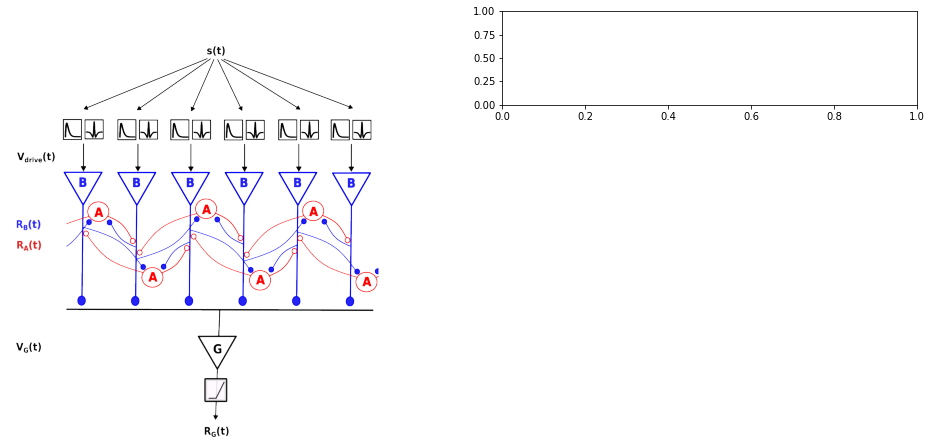

In [29]:
cbar = 'grey'
c1 = 'blue'
c2 = 'red'
speed_plot = -3

#initialize figure
nrows = 4
ncols = 4

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)



fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.25,
wspace=0.48)



ax = fig.add_subplot(gs[:,:2], frameon = False)


ax.set_xticks([])
ax.set_yticks([])


ax.imshow(circuit_scheme,aspect = 'equal')

ax = fig.add_subplot(gs[0,2:])
time = data['times'][speed_plot]
barr = [bar(t,pos_cell, v = speeds[speed_plot]) for t in time]

xdata = time  - pos_cell/speeds[speed_plot]
ax.plot(xdata ,barr, linewidth = lw, color = cbar, label = 'bar')
ax.plot(xdata,data[net]['F'][speed_plot]/np.max(data[net]['F'][-1]), label = '$V_{drive}$', color = 'k', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
#ax.set_ylabel('$V(t)')
ax.legend()
ax.set_yticks([])


ax = fig.add_subplot(gs[1,2:])
RB =data[net]['RB'][speed_plot]
RA =data[net]['RA'][speed_plot]   

ax.plot(xdata,RB/np.max(data[net]['RB'][-1]), color = c1, linewidth = lw, label = '$R_{B}$')
#ax.plot(xdata,RB, color = c1, linewidth = lw)

ax.plot(xdata,RA/np.max(data[net]['RA'][-1]), color = c2, linewidth = lw, label = '$R_{A}$')
#ax.plot(xdata,RA, color = c2, linewidth = lw)

ax.plot(xdata,data[net_pool]['RB'][speed_plot]/np.max(data[net_pool]['RB'][-1]), label = '$R_{B}$ bipolars only', color = c1, linestyle = ':', linewidth = lw)
#ax.plot(xdata,data[net_pool]['RB'][speed_plot], label = f'RB without lateral connectivity', color = c1, linestyle = ':', linewidth = lw)

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('relative $R(t)$')
ax.legend()


# add panel with all BC responses that the GC pools over
ax = fig.add_subplot(gs[2,2:])


# get BC cells that the GC pools from 
rf = DOG(paramsi['pos_rf_mid'],paramsi['pos_rf_mid'][cell],paramsi['std_GC'], paramsi['std_GC_s'], paramsi['w_GC'])
#rf = DOG(self.pos_rf_mid,self.pos_rf_GC_mid[i],self.std_GC,self.std_GC_surround,self.w)

BC_cells = []
BC_pos = []
BC_cells_weight = []

for p,val in enumerate(rf):
    if val >= 0.01:
        BC_cells.append(p)
        BC_pos.append((paramsi['pos_rf_mid'][p]-paramsi['pos_rf_mid'][cell])*100)
        BC_cells_weight.append(val)

#ax[0.scatter(BC_cells,rf[BC_cells])
print(BC_pos)
BC_cells= np.asarray(BC_cells)- cell
BC_cells = BC_cells.astype(int)
BC_cells_weight = np.asarray(BC_cells_weight)

BC_cells_short = BC_cells[0::12]
BC_pos_short = np.asarray(BC_pos[0::12])
BC_cells_weight_short = BC_cells_weight[0::12]
print(BC_cells_short)

cmap = plt.get_cmap('hsv', len(BC_cells_short))


for i,c in enumerate(BC_cells_short):

    r =  out['RB'][50 + c] *BC_cells_weight_short[i] 

    #ax.plot(r,linewidth = lw,  color = 'blue', alpha = (1-np.abs(c*0.01))-0.5)
    ax.plot(r,linewidth = lw,  color = cmap(i), label = f'{np.round(BC_pos_short[i])}')

#ax.legend()
cbar_ax = fig.add_axes([.78, .4, .1, .03])
cNorm = colors.Normalize(vmin =BC_pos_short.min(), vmax = BC_pos_short.max())
cmap = plt.get_cmap('hsv', 100)

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
fig.colorbar(scalarMap,
             cax=cbar_ax, orientation='horizontal', label='position [$\mu m$]')


ax.set_ylabel('$w_{i} R{i}_{B}(t)$')


ax = fig.add_subplot(gs[3,2:])
RG_pool =data[net_pool]['RG'][speed_plot]
RG =data[net]['RG'][speed_plot]
ax.plot(time - pos_cell/speeds[speed_plot],RG/RG.max(), color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(time - pos_cell/speeds[speed_plot],RG_pool/RG_pool.max(), linestyle = ':', color = 'k', linewidth = lw, label = 'bipolars only')

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_ylabel(' relative $R(t)$')
ax.set_xlabel('time [s]')


# speed scaling

In [118]:
#initialize figure
nrows = 2
ncols = 4

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')



fig.subplots_adjust(top=0.975,
bottom=0.195,
left=0.065,
right=0.9,
hspace=0.2,
wspace=0.61)



gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0:2])
x = 0

ti = data['times'][x]
barr = [bar(t,pos_cell, v = speeds[x]) for t in ti]
ax.plot(ti*speeds[x]  - pos_cell ,barr, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


ax = fig.add_subplot(gs[1,0:2], sharex = ax)
for x,si in enumerate(speeds[:]):
    ti = data['times'][x]*si
    RG = data[net]['RG'][x]
    ax.plot(ti  - pos_cell, RG, label = f'v = {si}', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$R(t)$')
ax.set_xlim(-0.4,0.4)
fig.legend()
ax = fig.add_subplot(gs[:,2:])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['ants']['RG_bar'] * speeds
antis_pool = data[net_pool]['ants']['RG_bar'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
ax.set_ylim(-.2,.15)
ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('anticipation [$mm$]')


Text(0, 0.5, 'anticipation [$mm$]')